## Kütüphaneler

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.preprocessing import image


## Path ve Etiketler

In [2]:
path_ = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"

In [3]:
labels = [i for i in os.listdir(path_) if "." not in i]
print(labels, "len ->", len(labels))

['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream'] len -> 9


## Dataseti tutmak için dataframe oluşturma

In [4]:
label = []
path = []

for dirpath, _ , filenames in os.walk(path_):
    for filename in filenames:
        if dirpath.split()[-1] != "GT":  # GT olanları kullanmayacağız
            if os.path.splitext(filename)[-1] == ".png":  # Sadece .png'leri al
                label.append(os.path.split(dirpath)[-1])
                path.append(os.path.join(dirpath, filename))

# Boş bir DataFrame oluşturma
df = pd.DataFrame(columns=["path", "label"])

# Path ve label sütunlarını doldurma
df["path"] = path
df["label"] = label

In [5]:
df.shape

(9000, 2)

## Oluşturulan Dataframe'i tanıma

In [6]:
df.head()

path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel

In [7]:
df.tail(10).T

8990  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8991  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8992  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8993  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8994  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8995  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8996  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8997  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8998  \
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...   
label                                      Red Sea Bream   

                                                    8999  
path   /kaggle/input/a-large-scale-fish-dataset/Fish_...  
label                                      Red Sea Bream

In [8]:
# Label ve içerik sayısına bakma
df.label.value_counts() 
# 9 etikete veriler eşit şekilde dağılmış bu sınıflandırma yapılması için harika bir durum!

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

In [9]:
#null var mı kontrol
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [10]:
df.describe() # 9000 örneklemden 9000 unique path var herhangi bir duplicate yok. 9 farklı etiket olduğunu burada da görüyorum

path            label
count                                                9000             9000
unique                                               9000                9
top     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
freq                                                    1             1000

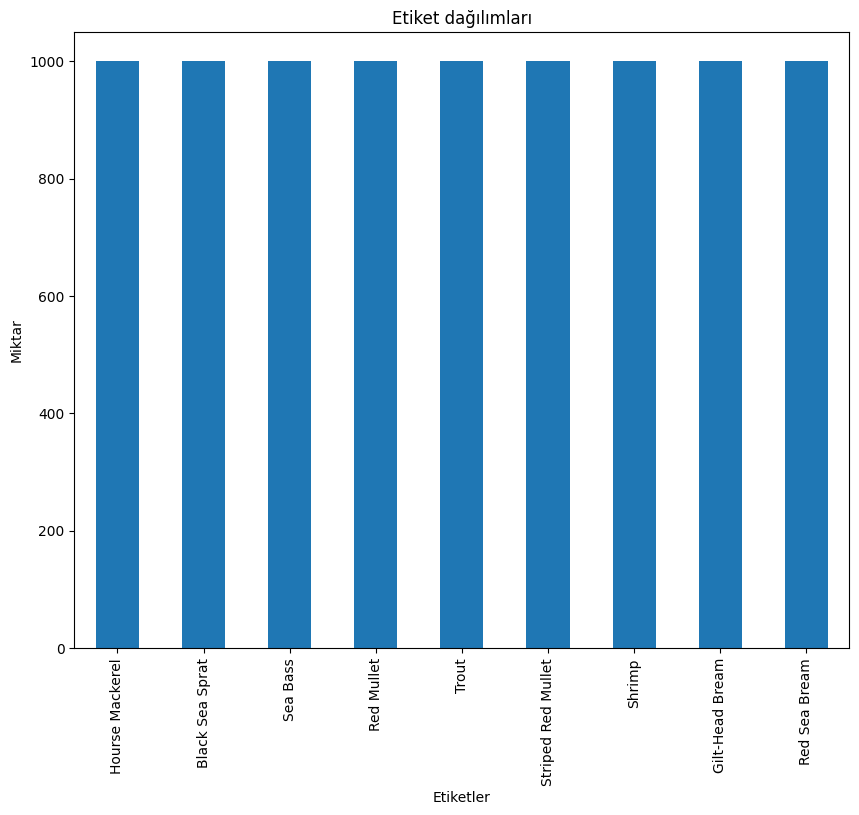

In [11]:
# Etiket dağılımlarını bir de plotta görüntüleyelim.

plt.figure(figsize = (10,8))
label_counts = df["label"].value_counts()
label_counts.plot(kind="bar")

plt.title("Etiket dağılımları")
plt.xlabel("Etiketler")
plt.ylabel("Miktar")
plt.show()

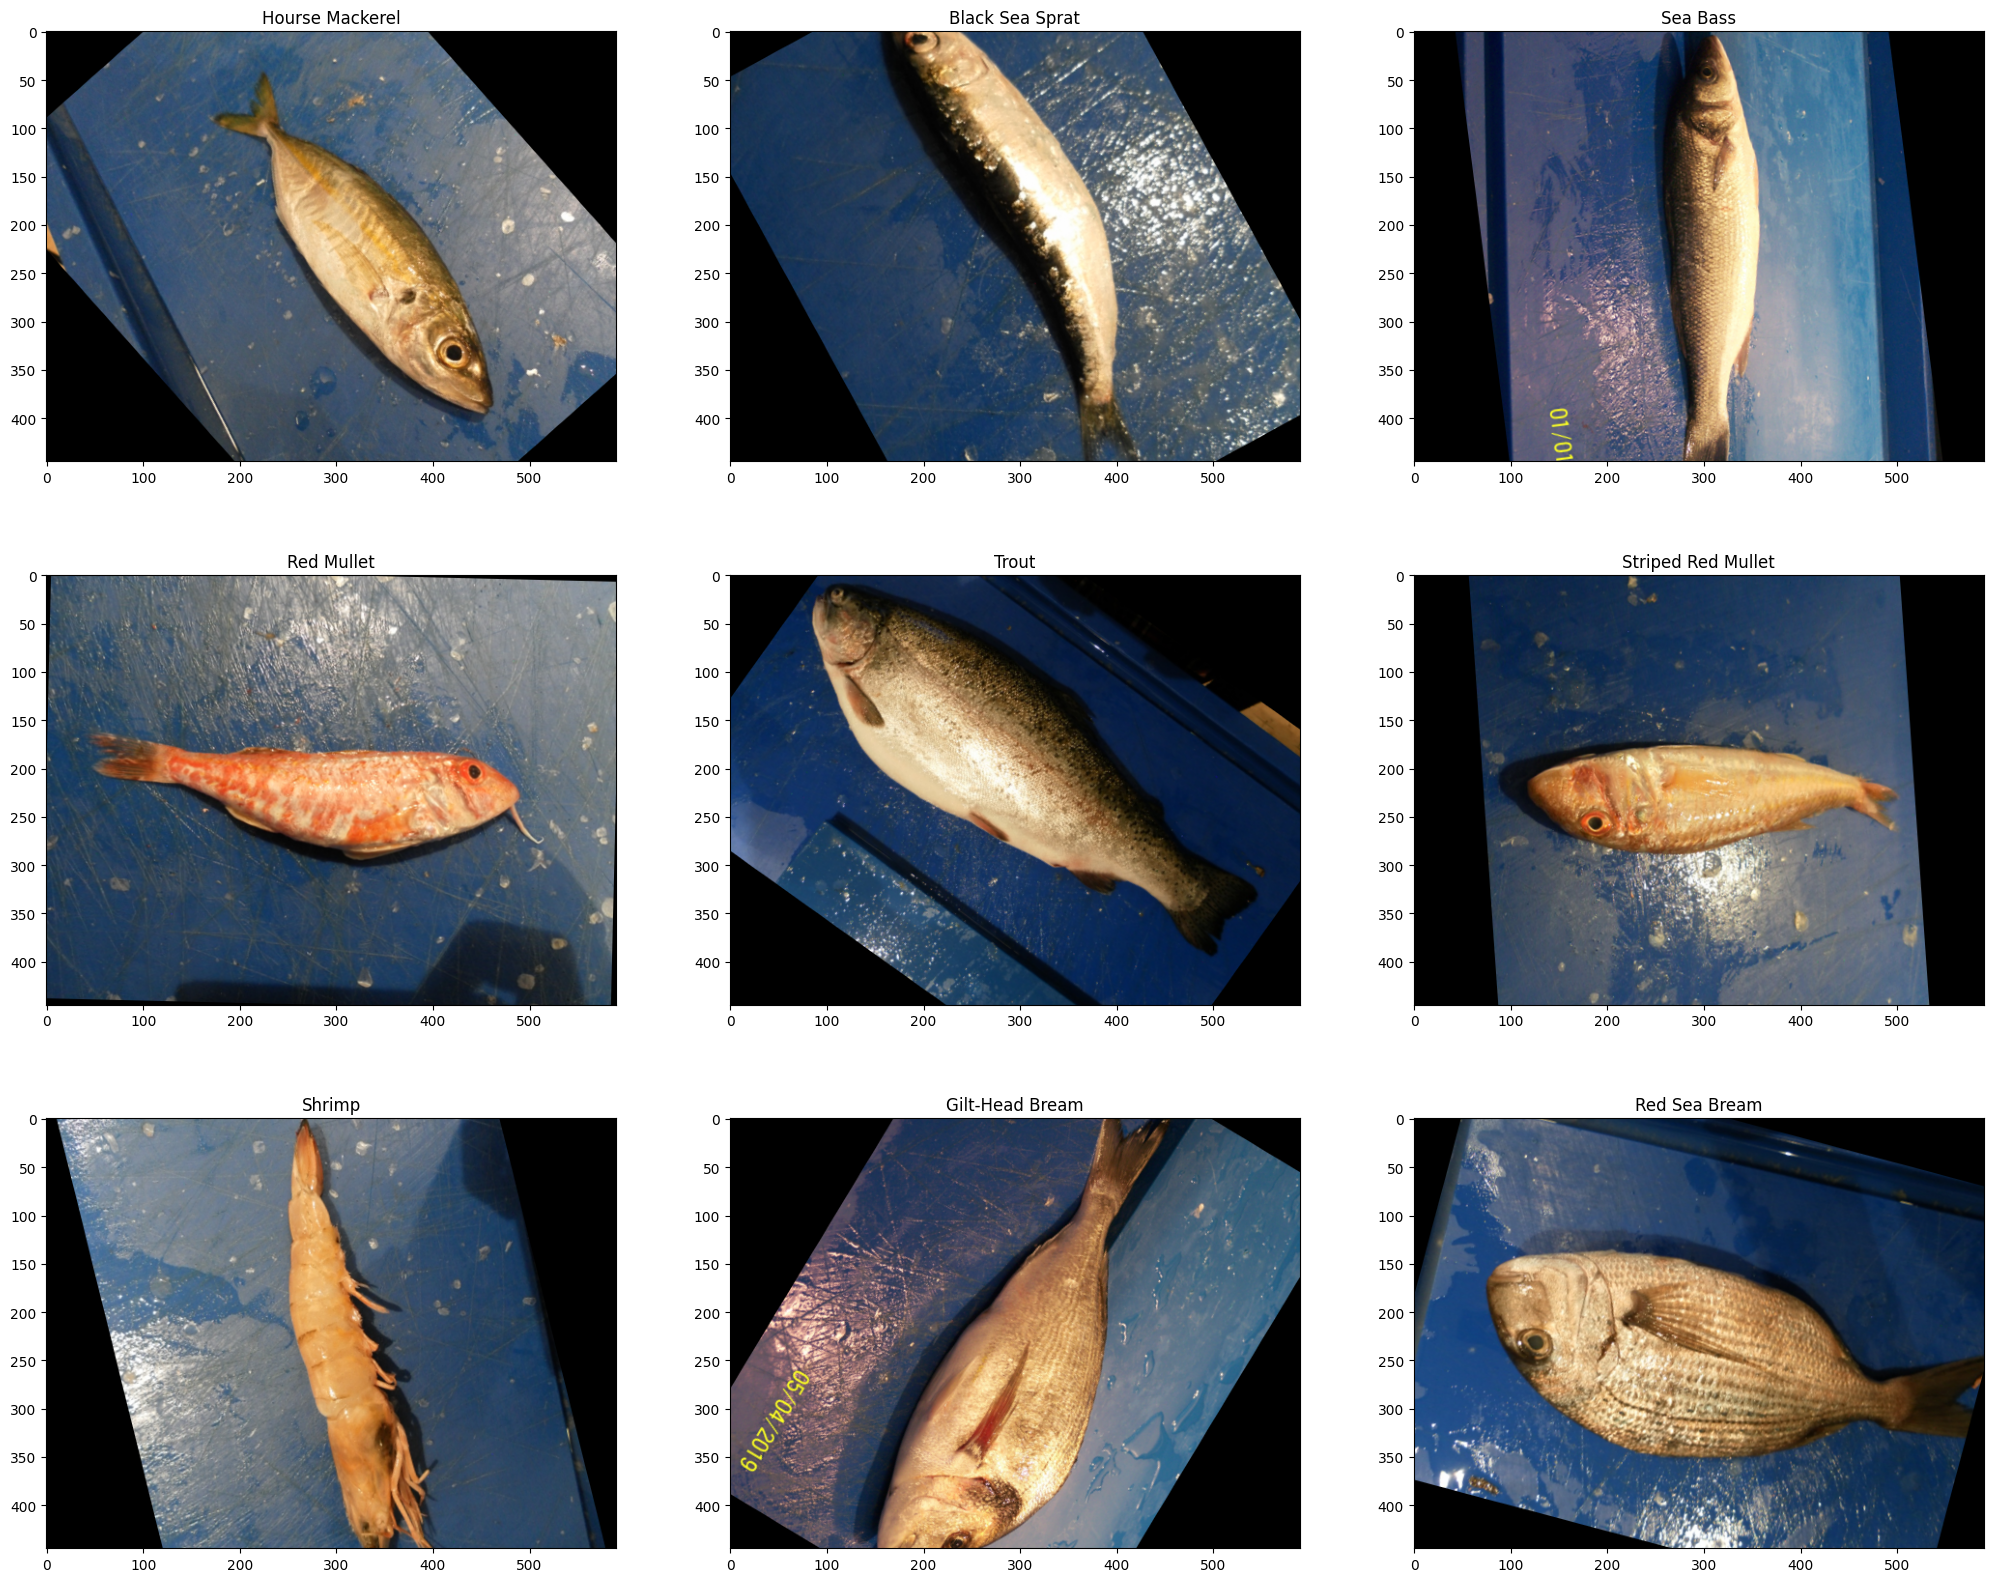

In [12]:
# Resimleri görelim
s = 0
plt.figure(figsize=(25,20))
for label in labels:
    plt.subplot(3, 3, s+1)
    plt.imshow(plt.imread(df[df['label']==label].iloc[0,0])) #label'ın bulunduğu ilk örneklemi alır
    plt.title(label)
    s+=1
    


## 

## Verileri Eğitim ve Test Kümelerine Ayırma

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(df["path"], df["label"], test_size = 0.2, shuffle=True, random_state=42) 
# %80 - %20

In [14]:
print(X_train.shape, "-", y_train.shape)
print(X_temp.shape, "-", y_temp.shape)

(7200,) - (7200,)
(1800,) - (1800,)


In [15]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_val.shape, "-", y_val.shape)
print(X_test.shape, "-", y_test.shape)

(900,) - (900,)
(900,) - (900,)


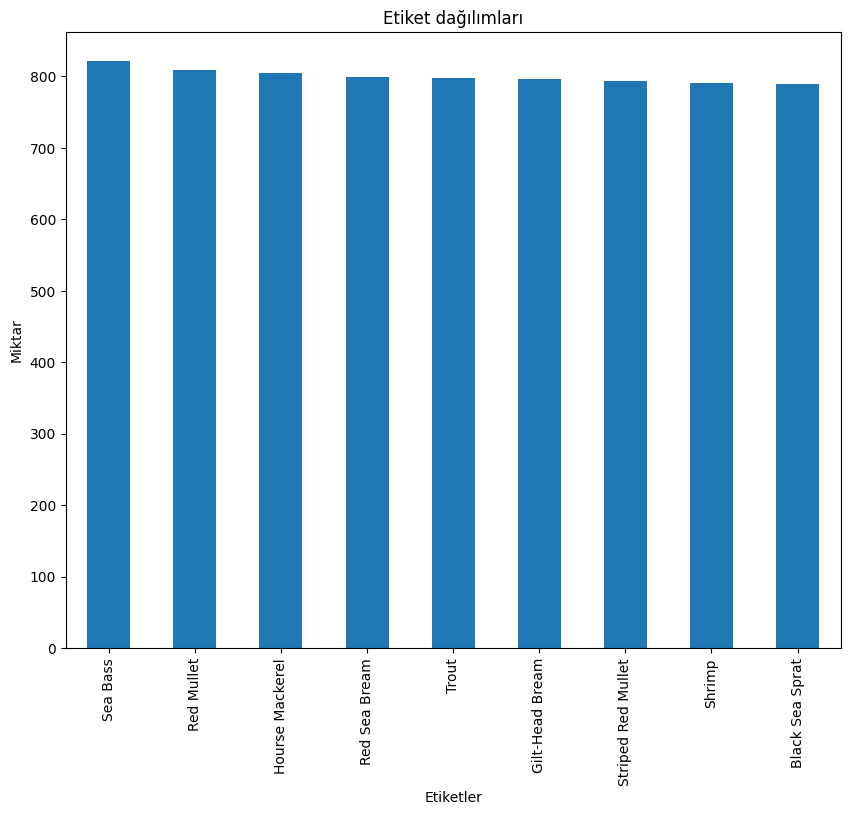

In [17]:
# Train kümemin nasıl dağıldığını merak ettim
plt.figure(figsize = (10,8))
label_counts = y_train.value_counts()
label_counts.plot(kind="bar")

plt.title("Etiket dağılımları")
plt.xlabel("Etiketler")
plt.ylabel("Miktar")
plt.show()

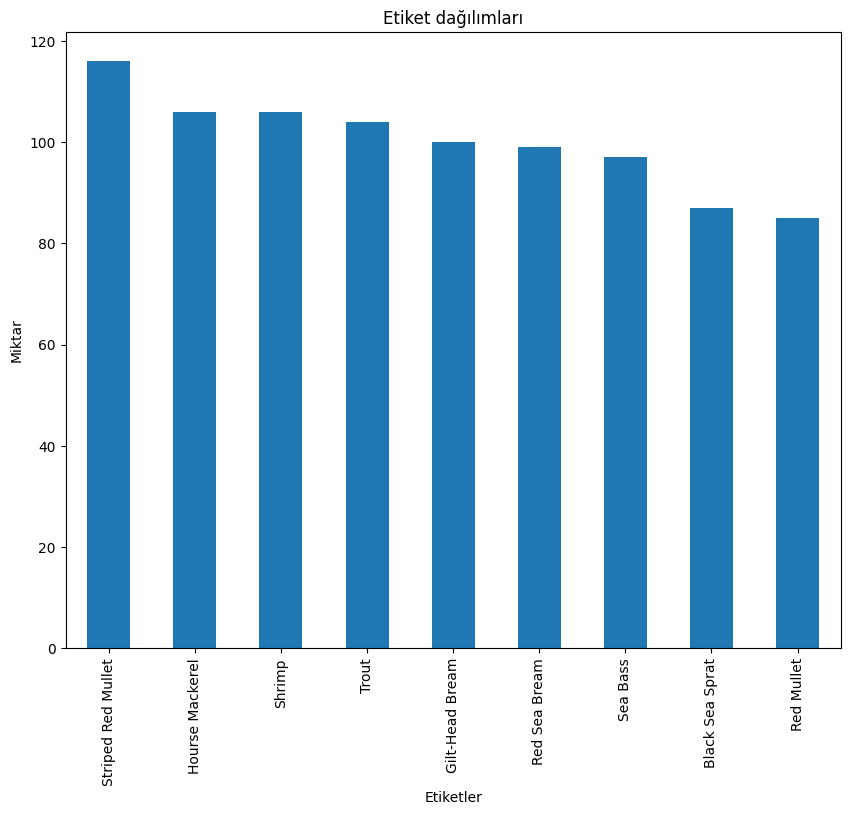

In [18]:
#testte nasıl dağıldığını merak ettim
plt.figure(figsize = (10,8))
label_counts = y_test.value_counts()
label_counts.plot(kind="bar")

plt.title("Etiket dağılımları")
plt.xlabel("Etiketler")
plt.ylabel("Miktar")
plt.show()

In [19]:
def load_image_as_array(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Görüntüyü yükleme
    img_array = image.img_to_array(img)  # Numpy array'e çevirme
    return img_array

In [21]:
train_images = np.stack(X_train.apply(load_image_as_array))
val_images = np.stack(X_val.apply(load_image_as_array))
test_images = np.stack(X_test.apply(load_image_as_array))

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalizasyon: Her pikseli 0-255'ten 0-1 aralığına getirir
    width_shift_range=0.1,     # Rastgele yatay kaydırma
    height_shift_range=0.1,    # Rastgele dikey kaydırma
    shear_range=0.1,           # Kesme dönüşü (shearing)
    zoom_range=0.1,            # Rastgele yakınlaştırma
)

# Test verisi için (genellikle augmentation yapılmaz)
val_test_datagen = ImageDataGenerator(rescale=1/255)



In [24]:
train_generator = train_datagen.flow(
    train_images,  
    y_train,  
    batch_size=32
)

validation_generator = val_test_datagen.flow(
    val_images,
    y_val,
    batch_size=32
)

test_generator = val_test_datagen.flow(
    test_images,
    y_test,
    batch_size=32,
    shuffle=False
)

In [ ]:
'''
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
'''

In [ ]:
'''
def load_and_preprocess_images(image_paths, need_flatten = 0):
    images = []
    for img_path in tqdm(image_paths):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) #resim numpy dizisi haline getirildi
        img_array /= 255.0 #0-255 arasındaki değeler 0-1 arasına çekilerek normalizasyon yapildi
        if need_flatten:
            img_array = img_array.flatten()  # ANN için tek boyutlu hale getirildi
        images.append(img_array)
    return np.array(images)
'''

In [ ]:
 '''
X_train_images_test = load_and_preprocess_images(X_train)
X_val_images_test = load_and_preprocess_images(X_val)
X_test_images_test = load_and_preprocess_images(X_test)
'''

In [ ]:
#X_test_images_test.shape


In [ ]:
'''
test_sample = X_test_images_test[0]
sample_label = y_test[0]
plt.imshow(test_sample)
plt.title(f'Sample Label: {sample_label}')
plt.axis('off')  # Eksenleri gizle
plt.show()'''

In [ ]:
#print(X_test_images_test[0])

In [ ]:
'''X_train_images = load_and_preprocess_images(X_train, need_flatten=1)
X_val_images = load_and_preprocess_images(X_val, need_flatten=1)
X_test_images = load_and_preprocess_images(X_test, need_flatten=1)
'''

In [ ]:
'''
print(X_train_images.shape)
print(X_val_images.shape)
print(X_test_images.shape)
'''

In [25]:

#Labellera one-hot encoding uygulandi
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Label Encoder oluştur
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)  # Eğitimi için fit
y_val_encoded = label_encoder.transform(y_val)  # Sadece transform
y_test_encoded = label_encoder.transform(y_test)  # Sadece transform

y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

print("Y Train One Hot Shape:", y_train_one_hot.shape)
print("Y Val One Hot Shape:", y_val_one_hot.shape)
print("Y Test One Hot Shape:", y_test_one_hot.shape)


Y Train One Hot Shape: (7200, 9)
Y Val One Hot Shape: (900, 9)
Y Test One Hot Shape: (900, 9)


## Model 

In [34]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Modeli yeniden oluştur
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))

model.add(Dense(256, activation='relu', kernel_regularizer=l2(best_l2_value)))
model.add(BatchNormalization())
model.add(Dropout(best_dropout_rate))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(best_l2_value)))
model.add(BatchNormalization())
model.add(Dropout(best_dropout_rate))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(best_l2_value)))
model.add(BatchNormalization())

model.add(Dense(9, activation='softmax'))

# Optimizer tanımla
optimizer = Adam(learning_rate=best_learning_rate)

# Modeli derle
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Öğrenme oranını azaltmak için geri çağırmalar
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Early stopping tanımla
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğit
history = model.fit(train_images, y_train_one_hot, 
                    validation_data=(val_images, y_val_one_hot),
                    epochs=30, 
                    batch_size=32, 
                    verbose=2, 
                    callbacks=[reduce_lr, early_stopping])

# Test setini değerlendir
test_loss, test_accuracy = model.evaluate(test_images, y_test_one_hot, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
225/225 - 11s - 51ms/step - accuracy: 0.4767 - loss: 8.0324 - val_accuracy: 0.5656 - val_loss: 6.7367 - learning_rate: 1.0000e-04
Epoch 2/30
225/225 - 4s - 18ms/step - accuracy: 0.6810 - loss: 5.7355 - val_accuracy: 0.4533 - val_loss: 5.8225 - learning_rate: 1.0000e-04
Epoch 3/30
225/225 - 4s - 18ms/step - accuracy: 0.7432 - loss: 4.3496 - val_accuracy: 0.5611 - val_loss: 4.4744 - learning_rate: 1.0000e-04
Epoch 4/30
225/225 - 4s - 18ms/step - accuracy: 0.7757 - loss: 3.4983 - val_accuracy: 0.3911 - val_loss: 5.4487 - learning_rate: 1.0000e-04
Epoch 5/30
225/225 - 4s - 18ms/step - accuracy: 0.7860 - loss: 2.9883 - val_accuracy: 0.3944 - val_loss: 5.2641 - learning_rate: 1.0000e-04
Epoch 6/30
225/225 - 4s - 18ms/step - accuracy: 0.7760 - loss: 2.7475 - val_accuracy: 0.2967 - val_loss: 6.1165 - learning_rate: 1.0000e-04
Epoch 7/30
225/225 - 4s - 19ms/step - accuracy: 0.8392 - loss: 2.4162 - val_accuracy: 0.6200 - val_loss: 2.9427 - learning_rate: 5.0000e-05
Epoch 8/30
225/225 

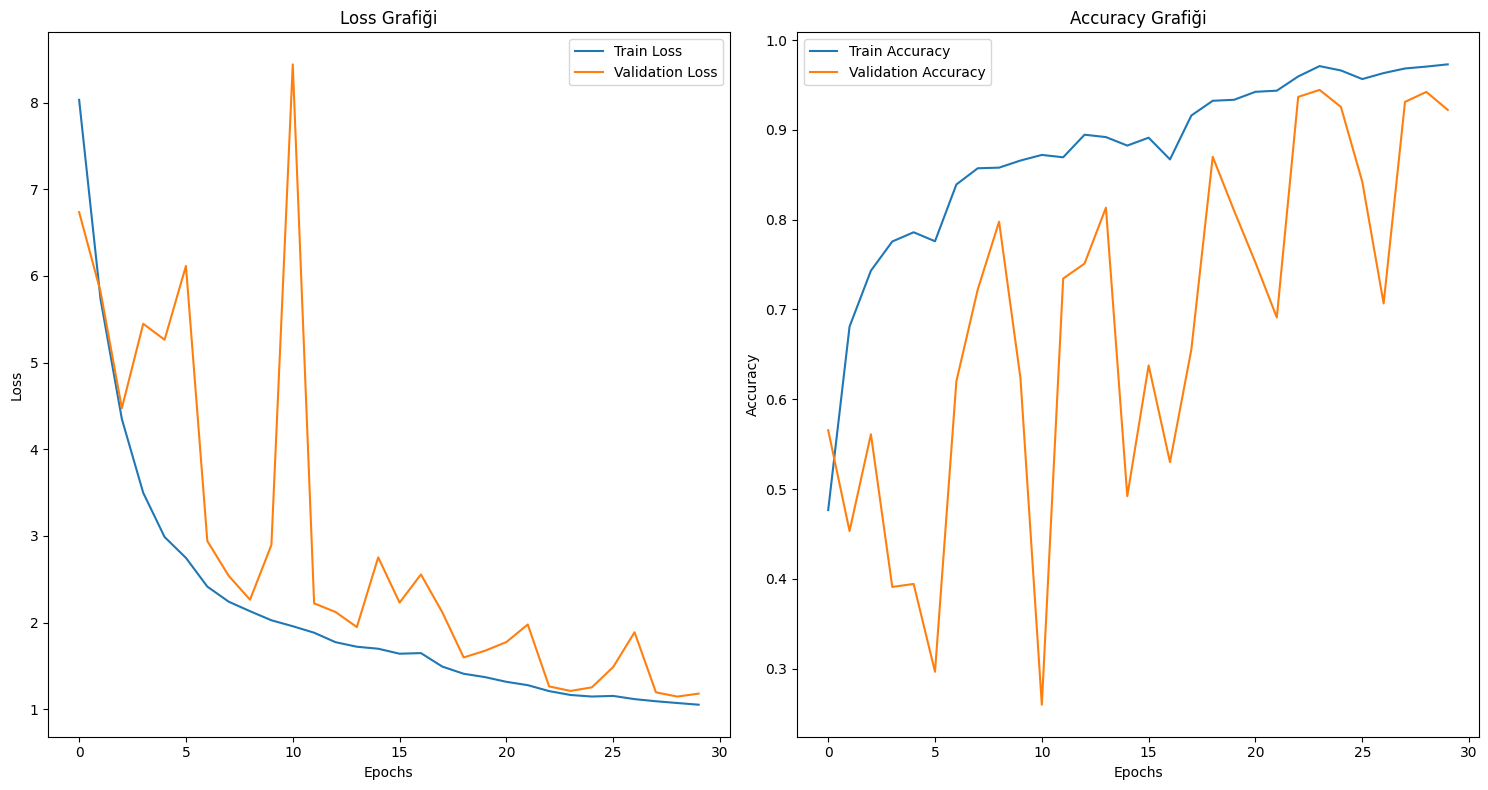

In [35]:
# train, val grafikleri
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Test Loss: 1.1465024948120117
Accuracy Score: 0.9388889074325562


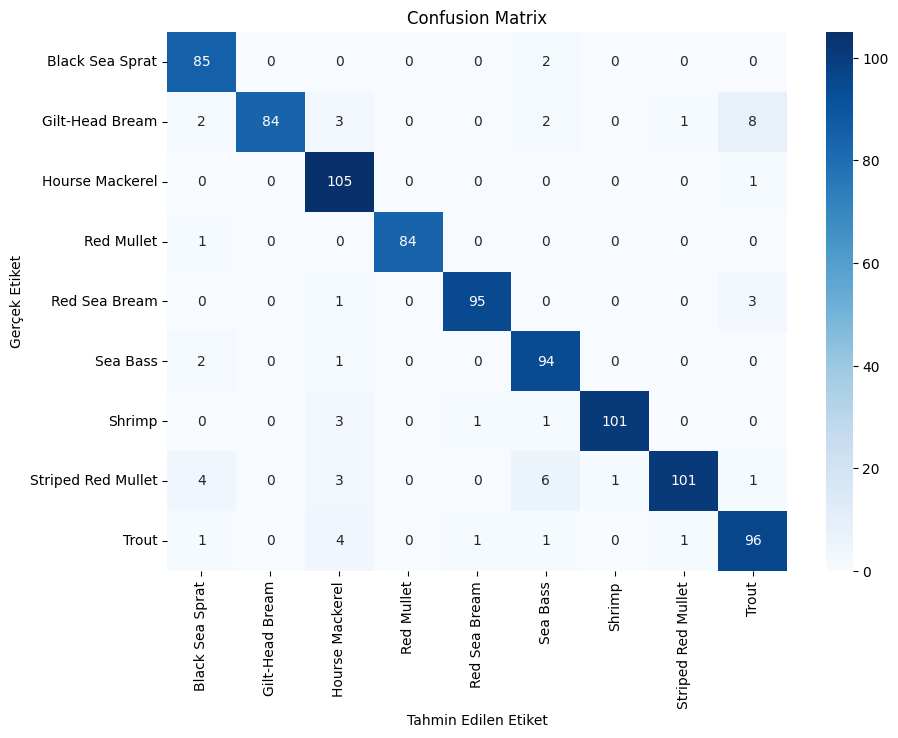

In [36]:
# Test
y_pred = model.predict(test_images) 
y_pred_classes = np.argmax(y_pred, axis=1)  # softmax ile olasılık değeri elde edildiğinden en yüksek olasılığı al

# Test setini değerlendir
test_loss, test_accuracy = model.evaluate(test_images, y_test_one_hot, verbose=0)  # y_test yerine y_test_one_hot kullanılacak
print('Test Loss:', test_loss)
print('Accuracy Score:', test_accuracy)

# Confusion matrix hesapla
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Gerçek etiketleri geri dönüştür
y_test_encoded = np.argmax(y_test_one_hot, axis=1)  # One-hot kodlamadan geri dönüştürme

# Confusion matrix'i hesapla
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Confusion matrix'i görselleştir
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.title('Confusion Matrix')
plt.show()
